In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df.head()

Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
df.describe()

Category                                             Resume
count              962                                                962
unique              25                                                166
top     Java Developer  Technical Skills Web Technologies: Angular JS,...
freq                84                                                 18

In [6]:
df.count()

Category    962
Resume      962
dtype: int64

In [7]:
df.shape

(962, 2)

In [8]:
counts=df['Category'].value_counts()

In [9]:
counts

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [10]:
categories_sorted_by_counts = counts.index.tolist()
sorted_counts = counts.tolist()
for category, count in zip(categories_sorted_by_counts, sorted_counts):
    print(f'{category}: {count}')

Java Developer: 84
Testing: 70
DevOps Engineer: 55
Python Developer: 48
Web Designing: 45
HR: 44
Hadoop: 42
Blockchain: 40
ETL Developer: 40
Operations Manager: 40
Data Science: 40
Sales: 40
Mechanical Engineer: 40
Arts: 36
Database: 33
Electrical Engineering: 30
Health and fitness: 30
PMO: 30
Business Analyst: 28
DotNet Developer: 28
Automation Testing: 26
Network Security Engineer: 25
SAP Developer: 24
Civil Engineer: 24
Advocate: 20


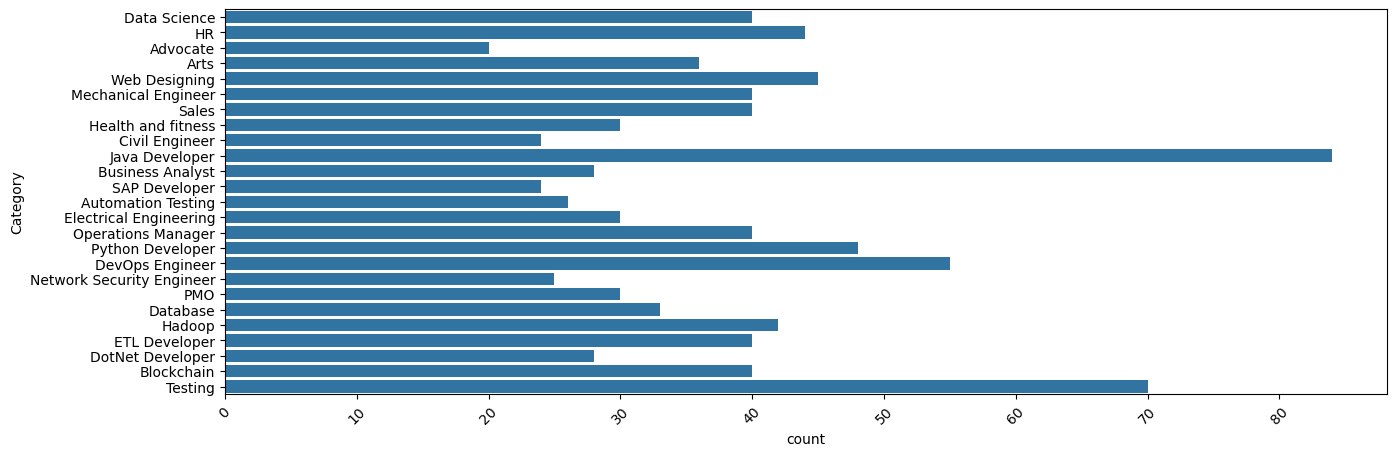

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(df["Category"])
plt.xticks(rotation=45)
plt.show()


In [12]:
labels=df["Category"].unique()

In [13]:
labels

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [14]:
total=len(labels)

In [15]:
total

25

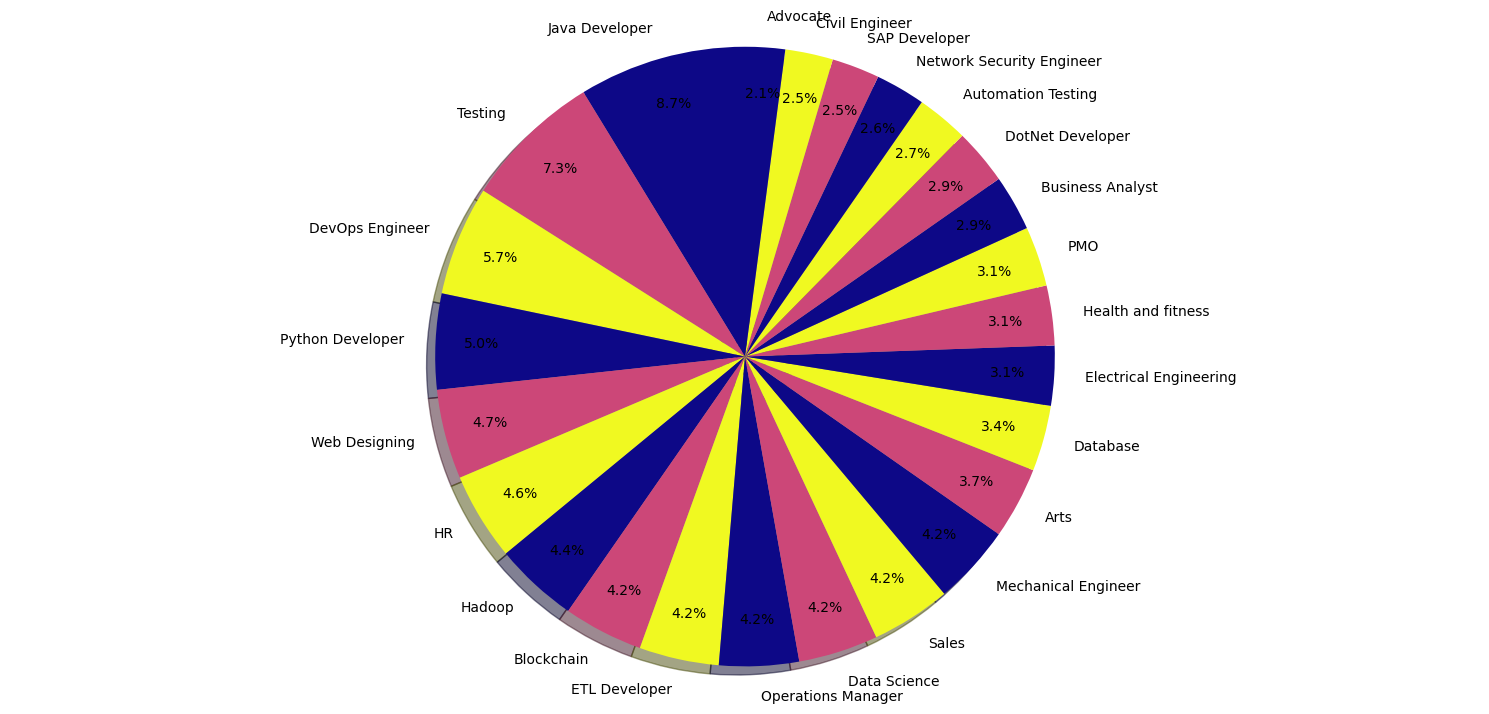

In [16]:
plt.figure(figsize=(15, 7))
plt.pie(sorted_counts, labels=categories_sorted_by_counts, autopct="%1.1f%%", shadow=True, 
        colors=plt.cm.plasma(np.linspace(0, 1, 3)),
        startangle=90, pctdistance=0.85)  
plt.axis('equal') 

plt.tight_layout() # Automatically adjusts subplot parameters to give some padding
plt.show()

In [17]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re

# Ensure you have the necessary NLTK data files
nltk.download('stopwords')

# Example of a function to clean text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove punctuation and special characters (keeping only alphanumeric characters and spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    
    # Remove multiple spaces and trim extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply clean_text function to each row in the "Resume" column
df["Resume"] = df["Resume"].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
print(df["Resume"])

0      skills programming languages python pandas num...
1      education details may may uitrgpv data scienti...
2      areas interest deep learning control system de...
3      skills r python sap hana tableau sap hana sql ...
4      education details mca ymcaust faridabad haryan...
                             ...                        
957    computer skills proficient ms office word basi...
958    willingness accept challenges positive thinkin...
959    personal skills quick learner eagerness learn ...
960    computer skills software knowledge mspower poi...
961    skill set os windows xp database mysql sql ser...
Name: Resume, Length: 962, dtype: object


In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [21]:
df['Category'].unique().sum()

300

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf.fit(df['Resume'])
requiredtext=tfidf.transform(df['Resume'])
print(requiredtext)

  (0, 7549)	0.07925498184465064
  (0, 7536)	0.01386079171778012
  (0, 7478)	0.015891967131584153
  (0, 7475)	0.04606977206626976
  (0, 7474)	0.08348889383197904
  (0, 7473)	0.07489759449683023
  (0, 7315)	0.09213954413253952
  (0, 7302)	0.032643525075537895
  (0, 7262)	0.02539631882020123
  (0, 7233)	0.036245946460171825
  (0, 7217)	0.01532924734160719
  (0, 7193)	0.04606977206626976
  (0, 7173)	0.014743713397399267
  (0, 7166)	0.06023192068934125
  (0, 7164)	0.018778823089419274
  (0, 7159)	0.02614213787096288
  (0, 7128)	0.04174444691598952
  (0, 7103)	0.02144481543404227
  (0, 7102)	0.023191234048815363
  (0, 7013)	0.04606977206626976
  (0, 6992)	0.04606977206626976
  (0, 6903)	0.18532209323404109
  (0, 6899)	0.06579423009253657
  (0, 6898)	0.09224395516218468
  (0, 6857)	0.03535092755509394
  :	:
  (961, 1855)	0.047679461131390925
  (961, 1838)	0.04187666577730913
  (961, 1813)	0.013958888592436375
  (961, 1660)	0.11479359374473949
  (961, 1588)	0.07964309702527389
  (961, 1471)	0.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredtext, df["Category"], test_size=0.22, random_state=42)

In [24]:
X_train.shape

(750, 7562)

In [25]:
X_test.shape

(212, 7562)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
Knn = OneVsRestClassifier(KNeighborsClassifier())
Knn.fit(X_train,y_train)
y_pred=Knn.predict(X_test)
print(y_pred)
print("accuracy score : ",accuracy_score(y_test,y_pred))

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23  2  3 18 14  1 12 13 22 12 11 23 18 15 19 15  6  0 15  8]
accuracy score :  0.9858490566037735


In [27]:
import pickle
pickle.dump(tfidf,open('tfidfd.pkl','wb'))
pickle.dump(Knn, open('knn.pkl', 'wb'))